# EDA Yelp - Convenience Stores

#### importa librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gabrielrojas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### inserta datasets

- Business

In [11]:
df_business = pd.read_parquet('../01-data-cleaned/YELP/business_cs.parquet')
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
260,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,IN,33610,28.010360,-82.430042,3.0,9,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None
378,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
755,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,MO,46203,39.737100,-86.139100,2.5,10,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-21:0', 'Monday': '8:0-21:0', '..."
816,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,NV,37214,36.211592,-86.694319,3.0,1639,1,"{'AcceptsInsurance': None, 'Alcohol': ''full_b...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
981,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,PA,08043,39.852159,-74.982640,4.5,6,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-22:0', 'Monday': '8:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668195,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,FL,33543,28.236004,-82.349088,2.5,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
668461,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,CA,89431,39.534947,-119.765698,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
668478,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,PA,19064,39.920225,-75.325974,3.5,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '..."
668532,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,IN,63115,38.660185,-90.225247,5.0,8,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '12:0-18:0', 'Monday': None, 'Satur..."


- Data Review

In [37]:
df_review =  pd.read_parquet('../01-data-cleaned/YELP/reviews_cs.parquet')
df_review

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0pMj5xUAecW9o1P35B0AMw,1,2017-05-26 13:10:24,0,40thYphUgIfvJq17QCfTwA,5.0,Great staff always helps and always nice. Alwa...,1,QzCEzH3R7Z6erOGLr3t55Q
1,ORL4JE6tz3rJxVqkdKfegA,0,2013-08-03 16:26:48,0,HSjRz31mvRBQRo8deXrr_w,2.0,"Too big, too expensive and too far from Downto...",0,K-3kF5Wc3b8cOHTAJpV9tA
2,_ReMedGR8eDM5AgdRK0jCw,2,2015-05-26 14:45:13,0,-Lkjo_vV2DEemMpMBlbeHA,4.0,"This is a convenience store deli, so don't exp...",3,g9fWvUzGBsKtovXrHM02uA
3,AY1SyySRyTnBwBdf7qfGxQ,2,2009-08-04 18:04:15,0,2fD2Do7xBjoahST3FmiwcQ,5.0,"From the second you walk in the door, you're g...",3,avQwKRvXc21koLCbahFEig
4,Ir4-CFGZDfloJkUMax13Og,0,2013-05-08 13:48:00,0,WqsuFJU7wqu5nSOGDdh-tQ,3.0,"They have a couple of really nice ladies, that...",1,mGUYWSFpmVvDQTLDvkzk4w
...,...,...,...,...,...,...,...,...,...
32915,FaY_9x8ZtsuHe5wS2iJM1Q,1,2021-07-24 22:52:25,0,6Ov3tR0qoAe-66POwD6-uw,3.0,"Very hole in the wall spot, no-nonsense servic...",0,pOLqrWCflFJUwXNCOX_sow
32916,pbP-0fvl7zwRHoI6qzgL6w,1,2017-05-11 23:54:33,1,_GLxcZNOYgTWzVPozmjDUQ,5.0,This Rite Aid has the friendliest staff ever! ...,1,32hMcxaohQrPBbNi5HRIeg
32917,je8HwCtpyIRQOa-QCNBf7w,0,2013-06-15 23:19:00,0,dzbFc_eZ-HXFzgn8BFmb4A,5.0,"Very good customer service. They try hard, an...",0,ORayZ85NtifE3oWG0o5MCg
32918,TP3dM7jh5_pTp1DKci_eSQ,12,2020-01-01 19:53:01,5,5BUtrBgmtveGaycBriKNUw,4.0,One of my favorite Wawa locations. \n\nConveni...,14,r9S0VYrdXJrdhfR7OXj8tA


- Data User

In [42]:
df_user = pd.read_parquet('../01-data-cleaned/YELP/user_cs.parquet')
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
2,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,63,46,47,21,518,773,867,867,310,231
3,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,11,2,2,0,16,23,43,43,20,25
4,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,1325,450,348,"2009,2010,2011","hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,...,4,2,7,1,35,17,20,20,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34929,85_uGvqVkwbjVY8YIMOlug,KC,16,2013-08-02 23:30:04,8,1,2,,2M-XDwADz9Bhwhd_RNAHqg,0,...,0,0,0,0,0,0,0,0,0,0
34930,IBO22g3UAEAOZm-10KZDtg,Izzy,100,2013-10-10 02:53:57,108,47,30,,"yT-_eBBTWf-iR8LflMZjAg, LR5KLo9TkFbuLTUnQXz0xA...",2,...,0,0,0,0,2,4,1,1,0,0
34931,O6e_dHvcb_UnsjmCXcQu_w,Melanie,29,2007-05-08 15:50:15,56,2,26,,"cSGDhxbg-zMO376-tvDgHw, 28HzJxxy91efxfh_qM2osQ...",3,...,3,0,0,0,4,2,1,1,0,0
34932,RPyGU7Q0Sqklh-9B3eTd-w,James,51,2015-04-09 22:30:23,42,8,16,,"08VmvYRYOoIZvXNTxxGdzg, q8pAYhK0Mpar_Vb_1R_tkg...",1,...,0,0,0,0,2,3,0,0,1,0


## Correcciones y Analisis
Esta sección pretende explorar los datos para comprender su distibución y obtetener conclusiones generales.

## 1. Business

In [15]:
df_business = df_business.drop(columns=['state'], axis=1)
df_business

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
260,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,33610,28.010360,-82.430042,3.0,9,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None
378,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
755,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,46203,39.737100,-86.139100,2.5,10,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-21:0', 'Monday': '8:0-21:0', '..."
816,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,37214,36.211592,-86.694319,3.0,1639,1,"{'AcceptsInsurance': None, 'Alcohol': ''full_b...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
981,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,08043,39.852159,-74.982640,4.5,6,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-22:0', 'Monday': '8:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668195,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,33543,28.236004,-82.349088,2.5,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
668461,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,89431,39.534947,-119.765698,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
668478,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,19064,39.920225,-75.325974,3.5,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '..."
668532,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,63115,38.660185,-90.225247,5.0,8,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '12:0-18:0', 'Monday': None, 'Satur..."


agrega al archivo business la correccion de los estados, ya que estaban mal indicados ademas de eliminar datos que no pertenecen a Estados Unidos

In [20]:
# 1. Convert latitude and longitude to Point objects
us_state = gpd.read_file('../01-data-cleaned/geodata/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

df_business["geometry"] = df_business.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)

# 2. Cast us_states geometry to a GeoDataFrame (if not already)
us_state = gpd.GeoDataFrame(us_state)

# 3. Function to check if point is within a state polygon
def is_within_state(point, state_geometry):
  return point.within(state_geometry)

# 4. Create a new column in business to store the state name
df_business["state_name"] = None

# 5. Loop through each point and assign corresponding state information
for index, row in df_business.iterrows():
  point = row["geometry"]
  for state_index, state_row in us_state.iterrows():
    state_geom = state_row["geometry"]
    if is_within_state(point, state_geom):
      df_business.at[index, "state_name"] = state_row["NAME"]
      df_business.at[index, "state_code"] = state_row["STUSPS"]  # Add new column
      break  # Stop checking after finding the state
# 6. Drop columns no longer needed

df_business = df_business.drop('geometry', axis=1)

# Now, business has two new columns "state_name" and "state_code" with the corrected state information for each point
df_business

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
260,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,33610,28.010360,-82.430042,3.0,9,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None,Florida,FL
378,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Pennsylvania,PA
755,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,46203,39.737100,-86.139100,2.5,10,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-21:0', 'Monday': '8:0-21:0', '...",Indiana,IN
816,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,37214,36.211592,-86.694319,3.0,1639,1,"{'AcceptsInsurance': None, 'Alcohol': ''full_b...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Tennessee,TN
981,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,08043,39.852159,-74.982640,4.5,6,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-22:0', 'Monday': '8:0-22:0', '...",New Jersey,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668195,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,33543,28.236004,-82.349088,2.5,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Florida,FL
668461,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,89431,39.534947,-119.765698,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Nevada,NV
668478,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,19064,39.920225,-75.325974,3.5,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '...",Pennsylvania,PA
668532,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,63115,38.660185,-90.225247,5.0,8,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '12:0-18:0', 'Monday': None, 'Satur...",Missouri,MO


visualiza las filas a borrar

In [21]:
# Select rows with null values in "state_corrected"
null_state_business = df_business[df_business["state_name"].isnull()]
null_state_business

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
74546,tRnOUrnAEJUWrf7SqVKJEQ,Hughes,8004 Roper Road,Edmonton,T6E 6T8,53.492697,-113.445417,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",None,NaN
127494,z5RtYZdELYWcXEJWna25IQ,Oomomo,"8882 170 Street NW, Unit 1112",Edmonton,T5T 4M2,53.522314,-113.622431,3.5,21,0,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '10:0-21:0', 'Monday': '10:0-21:0',...",None,NaN
161375,WIf1NO9OEUkqPR4R52cs6Q,Westmount Mini-Mart,"Westmount Shopping Ctr, 200 Westmount Ctr NW",Edmonton,T5M 3L7,53.560803,-113.553836,2.0,13,0,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None,None,NaN
236680,9X3TVvOLQUjRgwMN0lxnSw,Mac's,600 Hermitage Road NW,Edmonton,T5A 4N2,53.586716,-113.406768,3.0,5,0,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",None,NaN
251395,4FgqxMPsERjzMe1BfcUeVA,London Drugs,14951 Stony Plain Rd,Edmonton,T5P 4W1,53.540242,-113.578677,4.0,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '9:0-18:30', 'Monday': '0:0-0:0', '...",None,NaN
283193,ESSYJove68McC_cNcvqxFw,Arthur's Car Wash & Convenience,10931 - 156 Street NW,Edmonton,T5P 2S7,53.554984,-113.589693,5.0,10,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-21:0', 'Monday': '6:0-21:0', '...",None,NaN
299550,RPyGe6IscKzcJDt7iF86lw,Argyll Foods,9844 63 Avenue NW,Edmonton,T6E 0G6,53.500258,-113.484950,4.5,17,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', '...",None,NaN
303602,UHAB2XH3Qpjv4CgZXW11-g,Co-op,2331 66th Street NW,Edmonton,T6K 4B4,53.456002,-113.431737,3.5,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '...",None,NaN
345617,G2sQXq3VGVDuYWyZEDcNBA,Varsity Health and Beauty,"39 HUB Mall, University of Alberta, 9005 112 St",Edmonton,T6G,53.525761,-113.520677,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None,None,NaN
356237,CLboXaxb9V6tnD69sYbJRw,7-Eleven,10357 Jasper Ave NW,Edmonton,T5J 1Y5,53.540703,-113.499010,3.0,7,0,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",None,NaN


borra los datos no utiles

In [23]:
# Elimina las filas identificadas con valores nulos en "state_name"
df_business = df_business.drop(null_state_business.index)

# Imprime el DataFrame modificado
df_business

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
260,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,33610,28.010360,-82.430042,3.0,9,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None,Florida,FL
378,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Pennsylvania,PA
755,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,46203,39.737100,-86.139100,2.5,10,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-21:0', 'Monday': '8:0-21:0', '...",Indiana,IN
816,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,37214,36.211592,-86.694319,3.0,1639,1,"{'AcceptsInsurance': None, 'Alcohol': ''full_b...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Tennessee,TN
981,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,08043,39.852159,-74.982640,4.5,6,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-22:0', 'Monday': '8:0-22:0', '...",New Jersey,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668195,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,33543,28.236004,-82.349088,2.5,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Florida,FL
668461,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,89431,39.534947,-119.765698,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Nevada,NV
668478,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,19064,39.920225,-75.325974,3.5,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '...",Pennsylvania,PA
668532,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,63115,38.660185,-90.225247,5.0,8,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '12:0-18:0', 'Monday': None, 'Satur...",Missouri,MO


####  Análisis Gráfico.
Genera visualizaciones espaciales y  gráficos para analizar la distribución de los datos. 

- cambia el tipo de dato de las coordenadas para poder visualizar

In [24]:

# Convertir la columna 'longitude' a tipo float
df_business['longitude'] = df_business['longitude'].astype(float)

# Convertir la columna 'latitude' a tipo float
df_business['latitude'] = df_business['latitude'].astype(float)

df_business

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,state_name,state_code
260,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,33610,28.010360,-82.430042,3.0,9,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,None,Florida,FL
378,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Pennsylvania,PA
755,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,46203,39.737100,-86.139100,2.5,10,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-21:0', 'Monday': '8:0-21:0', '...",Indiana,IN
816,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,37214,36.211592,-86.694319,3.0,1639,1,"{'AcceptsInsurance': None, 'Alcohol': ''full_b...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Tennessee,TN
981,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,08043,39.852159,-74.982640,4.5,6,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '8:0-22:0', 'Monday': '8:0-22:0', '...",New Jersey,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668195,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,33543,28.236004,-82.349088,2.5,7,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Florida,FL
668461,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,89431,39.534947,-119.765698,4.0,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa...",Nevada,NV
668478,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,19064,39.920225,-75.325974,3.5,5,1,"{'AcceptsInsurance': None, 'Alcohol': None, 'A...",Convenience Stores,"{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '...",Pennsylvania,PA
668532,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,63115,38.660185,-90.225247,5.0,8,1,"{'AcceptsInsurance': None, 'Alcohol': 'u'none'...",Convenience Stores,"{'Friday': '12:0-18:0', 'Monday': None, 'Satur...",Missouri,MO


- visualiza las ubicaciones de cada store para tener una mayor comprensión de las mismas

In [27]:
# Coordenadas aproximadas del centro de Estados Unidos
latitud_centro_eeuu = 39.8097
longitud_centro_eeuu = -98.5506

# Crear un mapa centrado en Estados Unidos
mapa = folium.Map(location=[latitud_centro_eeuu, longitud_centro_eeuu], zoom_start=4.4)

# Agregar una capa de mapa de OpenStreetMap
folium.TileLayer('openstreetmap').add_to(mapa)

# Agregar los puntos al mapa
for index, row in df_business.iterrows():
    # Obtener las coordenadas de cada punto
    coordenada_y = row["latitude"]
    coordenada_x = row["longitude"]
    
    # Agregar un marcador en el mapa para cada punto
    folium.Marker([coordenada_y, coordenada_x]).add_to(mapa)

# Visualizar el mapa
mapa


- El mapa indica que los locales de la base de datos se encuentran dentro del radio metropolitano de algunas urbes estadounidenses, entre ellas: Tampa, FL; Philadelphia, PA. Nashville, TN; y Tucson, AZ.

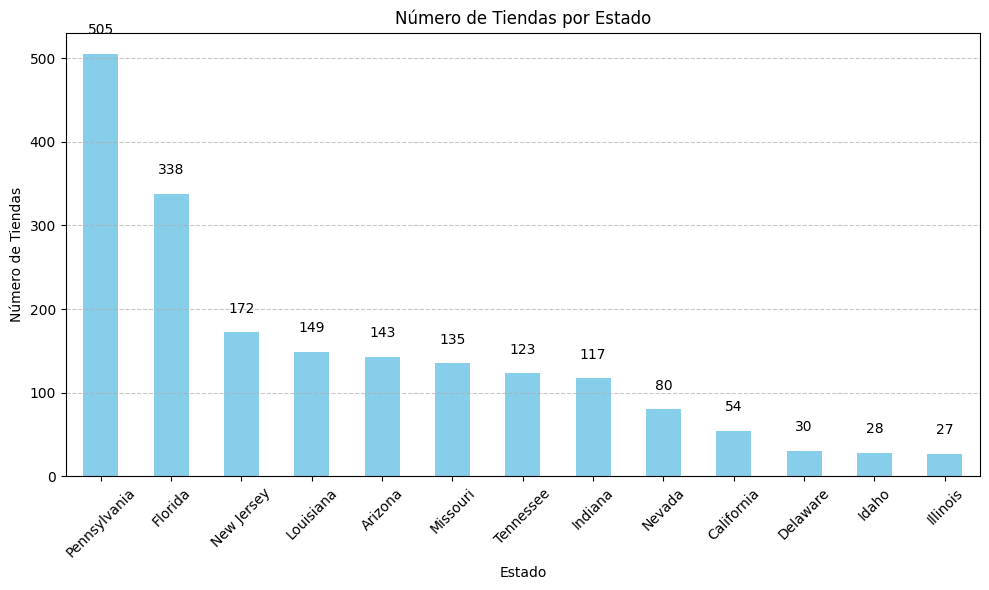

In [28]:
# Contar el número de tiendas por estado
tiendas_por_estado = df_business['state_name'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = tiendas_por_estado.plot(kind='bar', color='skyblue')
plt.title('Número de Tiendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Tiendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto para mostrar la cantidad exacta en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

los estados con mayor cantidad de tiendas son: 
- pennsylvania
- florida

los cuales muestran una cantidad superior a los 300 locales

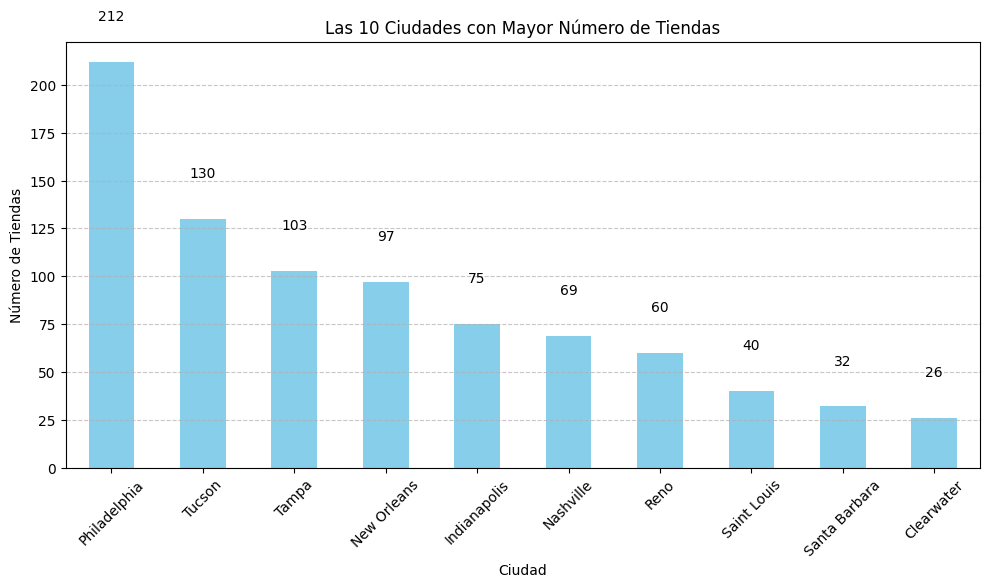

In [29]:
# Contar el número de tiendas por ciudad
tiendas_por_ciudad = df_business['city'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = tiendas_por_ciudad.plot(kind='bar', color='skyblue')
plt.title('Las 10 Ciudades con Mayor Número de Tiendas')
plt.xlabel('Ciudad')
plt.ylabel('Número de Tiendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto para mostrar la cantidad exacta en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


Las ciudades con mayor numero de convenience stores registradas son Philadelphia, PA y Tucson, AZ. Mostrando una variación respecto al gráfico anterior.

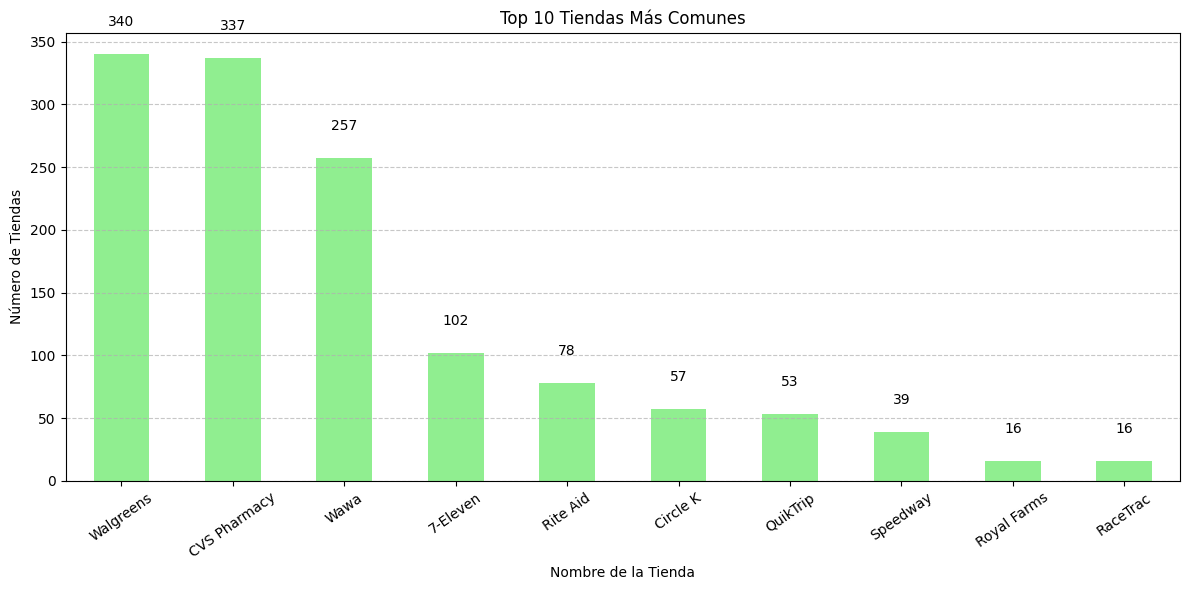

In [30]:
# Contar el número de tiendas por nombre de tienda
tiendas_por_nombre = df_business['name'].value_counts().head(10)  # Selecciona las 10 más comunes

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = tiendas_por_nombre.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Tiendas Más Comunes')
plt.xlabel('Nombre de la Tienda')
plt.ylabel('Número de Tiendas')
plt.xticks(rotation=35)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto para mostrar la cantidad exacta en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Walgreens se posiciona a la cabeza de los competidores en el rubro, con el mayor número de tiendas. Seguido muy de cerca por CVS. 

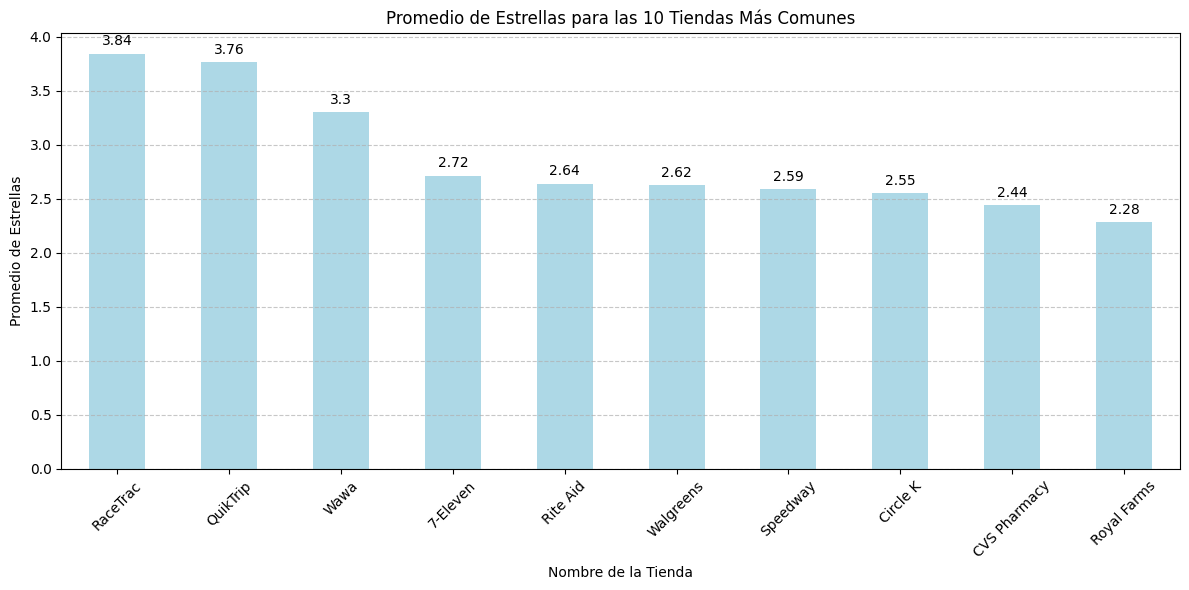

In [31]:
# Obtener las 10 tiendas más comunes
top_10_tiendas = df_business['name'].value_counts().head(10).index.tolist()

# Filtrar el DataFrame para incluir solo las filas correspondientes a las 10 tiendas más comunes
df_top_10_tiendas = df_business[df_business['name'].isin(top_10_tiendas)]

# Calcular el promedio de estrellas por nombre de tienda
promedio_estrellas_por_nombre = df_top_10_tiendas.groupby('name')['stars'].mean()

# Ordenar las tiendas por su promedio de estrellas de mayor a menor
promedio_estrellas_por_nombre = promedio_estrellas_por_nombre.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = promedio_estrellas_por_nombre.plot(kind='bar', color='lightblue')
plt.title('Promedio de Estrellas para las 10 Tiendas Más Comunes')
plt.xlabel('Nombre de la Tienda')
plt.ylabel('Promedio de Estrellas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto para mostrar el promedio de estrellas en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


- Respecto a las evaluación, RaceTrac encabeza la lista de las tiendas con mayor promedio de estrellas otorgadas. Walgreens se encuentra en sexto lugar.

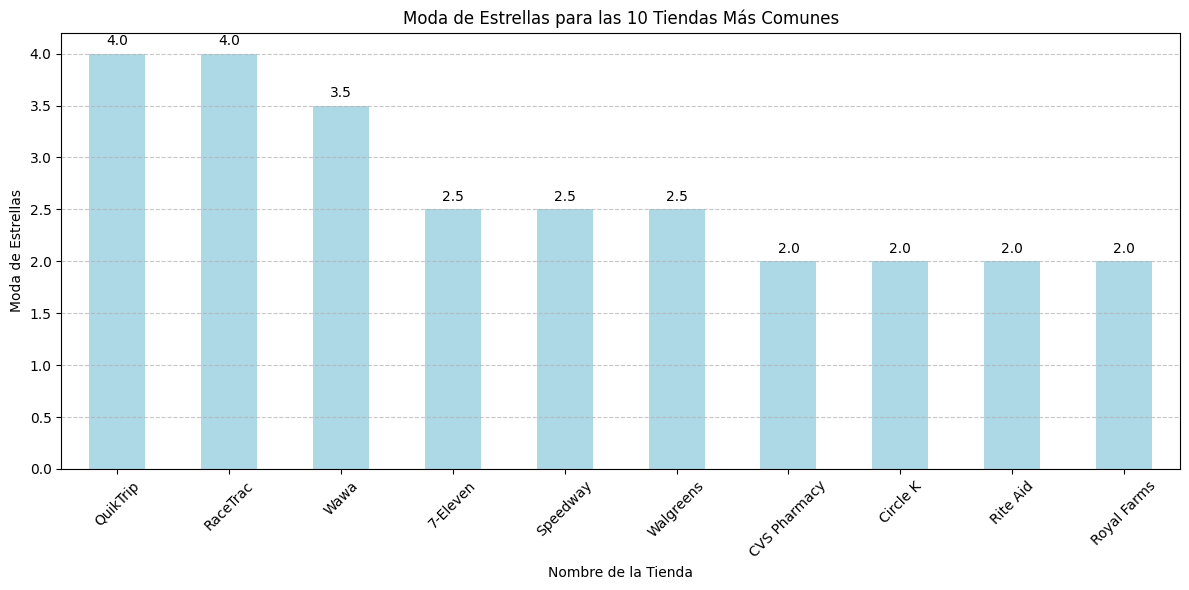

In [32]:
import matplotlib.pyplot as plt

# Obtener las 10 tiendas más comunes
top_10_tiendas = df_business['name'].value_counts().head(10).index.tolist()

# Filtrar el DataFrame para incluir solo las filas correspondientes a las 10 tiendas más comunes
df_top_10_tiendas = df_business[df_business['name'].isin(top_10_tiendas)]

# Calcular la moda de estrellas por nombre de tienda
moda_estrellas_por_nombre = df_top_10_tiendas.groupby('name')['stars'].agg(lambda x: x.mode().iloc[0])

# Ordenar las tiendas por su moda de estrellas de mayor a menor
moda_estrellas_por_nombre = moda_estrellas_por_nombre.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = moda_estrellas_por_nombre.plot(kind='bar', color='lightblue')
plt.title('Moda de Estrellas para las 10 Tiendas Más Comunes')
plt.xlabel('Nombre de la Tienda')
plt.ylabel('Moda de Estrellas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto para mostrar la moda de estrellas en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


Revisando la moda de la cantidad de estrellas, RaceTrac y QuikTrip encabezan la lista. En tercera posición, se encuentra Walgreens, junto con 7-Eleven y Speedway.

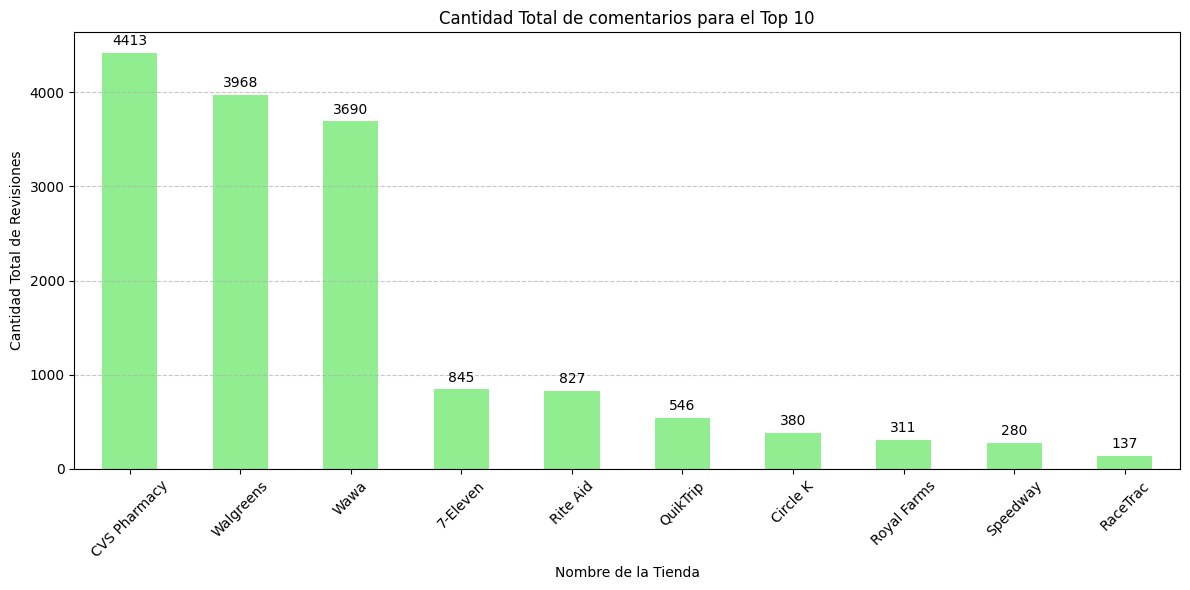

In [33]:
# Obtener las 10 tiendas más comunes
top_10_tiendas = df_business['name'].value_counts().head(10).index.tolist()

# Filtrar el DataFrame para incluir solo las filas correspondientes a las 10 tiendas más comunes
df_top_10_tiendas = df_business[df_business['name'].isin(top_10_tiendas)]

# Calcular la cantidad total de revisiones por nombre de tienda
total_reviews_por_nombre = df_top_10_tiendas.groupby('name')['review_count'].sum()

# Ordenar las tiendas por la cantidad total de revisiones de mayor a menor
total_reviews_por_nombre = total_reviews_por_nombre.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = total_reviews_por_nombre.plot(kind='bar', color='lightgreen')
plt.title('Cantidad Total de comentarios para el Top 10')
plt.xlabel('Nombre de la Tienda')
plt.ylabel('Cantidad Total de Revisiones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de texto para mostrar la cantidad total de revisiones en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Respecto a la cantidad de comentarios, Walgreens se encuentra en segundo lugar después de CVS Pharmacy. 

#### borra columnas 
 - elimina columnas "hours", "is_open" y "attributes" por no aportar información de valor para el análisis.

In [34]:
# Eliminar la columna 'hours' del DataFrame
df_business.drop(columns=['hours', 'is_open', 'attributes'], inplace=True)
df_business

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,categories,state_name,state_code
260,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,33610,28.010360,-82.430042,3.0,9,Convenience Stores,Florida,FL
378,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,Convenience Stores,Pennsylvania,PA
755,m9ncuZp0nEVhIwu24G-HRw,CVS Pharmacy,2215 Shelby St,Indianapolis,46203,39.737100,-86.139100,2.5,10,Convenience Stores,Indiana,IN
816,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,37214,36.211592,-86.694319,3.0,1639,Convenience Stores,Tennessee,TN
981,rCoWa-C7Os51GjFkCnFlVw,Rite Aid,700 Haddonfield Berlin Rd S37,Voorhees,08043,39.852159,-74.982640,4.5,6,Convenience Stores,New Jersey,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...
668195,UKg1F0v-3q5V5SCyGWYj1g,Speedway,28232 Wesley Chapel Blvd,Wesley Chapel,33543,28.236004,-82.349088,2.5,7,Convenience Stores,Florida,FL
668461,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,89431,39.534947,-119.765698,4.0,5,Convenience Stores,Nevada,NV
668478,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,600 Baltimore Pike,Springfield,19064,39.920225,-75.325974,3.5,5,Convenience Stores,Pennsylvania,PA
668532,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,63115,38.660185,-90.225247,5.0,8,Convenience Stores,Missouri,MO


## 2. Review

-  separa columna con la 'date', en columnas 'fecha' y 'hora', de cada review

In [44]:
# Convertir la columna 'date' a tipo datetime
df_review['fecha'] = pd.to_datetime(df_review['date'])

# Extraer solo la fecha (year-month-day)
df_review['fecha'] = df_review['fecha'].dt.strftime('%Y-%m-%d')

# Mostrar solo la columna 'fecha'
df_review

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,fecha
0,0pMj5xUAecW9o1P35B0AMw,1,2017-05-26 13:10:24,0,40thYphUgIfvJq17QCfTwA,5.0,Great staff always helps and always nice. Alwa...,1,QzCEzH3R7Z6erOGLr3t55Q,2017-05-26
1,ORL4JE6tz3rJxVqkdKfegA,0,2013-08-03 16:26:48,0,HSjRz31mvRBQRo8deXrr_w,2.0,"Too big, too expensive and too far from Downto...",0,K-3kF5Wc3b8cOHTAJpV9tA,2013-08-03
2,_ReMedGR8eDM5AgdRK0jCw,2,2015-05-26 14:45:13,0,-Lkjo_vV2DEemMpMBlbeHA,4.0,"This is a convenience store deli, so don't exp...",3,g9fWvUzGBsKtovXrHM02uA,2015-05-26
3,AY1SyySRyTnBwBdf7qfGxQ,2,2009-08-04 18:04:15,0,2fD2Do7xBjoahST3FmiwcQ,5.0,"From the second you walk in the door, you're g...",3,avQwKRvXc21koLCbahFEig,2009-08-04
4,Ir4-CFGZDfloJkUMax13Og,0,2013-05-08 13:48:00,0,WqsuFJU7wqu5nSOGDdh-tQ,3.0,"They have a couple of really nice ladies, that...",1,mGUYWSFpmVvDQTLDvkzk4w,2013-05-08
...,...,...,...,...,...,...,...,...,...,...
32915,FaY_9x8ZtsuHe5wS2iJM1Q,1,2021-07-24 22:52:25,0,6Ov3tR0qoAe-66POwD6-uw,3.0,"Very hole in the wall spot, no-nonsense servic...",0,pOLqrWCflFJUwXNCOX_sow,2021-07-24
32916,pbP-0fvl7zwRHoI6qzgL6w,1,2017-05-11 23:54:33,1,_GLxcZNOYgTWzVPozmjDUQ,5.0,This Rite Aid has the friendliest staff ever! ...,1,32hMcxaohQrPBbNi5HRIeg,2017-05-11
32917,je8HwCtpyIRQOa-QCNBf7w,0,2013-06-15 23:19:00,0,dzbFc_eZ-HXFzgn8BFmb4A,5.0,"Very good customer service. They try hard, an...",0,ORayZ85NtifE3oWG0o5MCg,2013-06-15
32918,TP3dM7jh5_pTp1DKci_eSQ,12,2020-01-01 19:53:01,5,5BUtrBgmtveGaycBriKNUw,4.0,One of my favorite Wawa locations. \n\nConveni...,14,r9S0VYrdXJrdhfR7OXj8tA,2020-01-01


In [45]:
# Convertir la columna 'columna_fecha_hora' a tipo datetime y extraer solo la hora
df_review['hora_review'] = pd.to_datetime(df_review['date']).dt.hour

# Mostrar las primeras filas del DataFrame para verificar el cambio
df_review


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,fecha,hora_review
0,0pMj5xUAecW9o1P35B0AMw,1,2017-05-26 13:10:24,0,40thYphUgIfvJq17QCfTwA,5.0,Great staff always helps and always nice. Alwa...,1,QzCEzH3R7Z6erOGLr3t55Q,2017-05-26,13
1,ORL4JE6tz3rJxVqkdKfegA,0,2013-08-03 16:26:48,0,HSjRz31mvRBQRo8deXrr_w,2.0,"Too big, too expensive and too far from Downto...",0,K-3kF5Wc3b8cOHTAJpV9tA,2013-08-03,16
2,_ReMedGR8eDM5AgdRK0jCw,2,2015-05-26 14:45:13,0,-Lkjo_vV2DEemMpMBlbeHA,4.0,"This is a convenience store deli, so don't exp...",3,g9fWvUzGBsKtovXrHM02uA,2015-05-26,14
3,AY1SyySRyTnBwBdf7qfGxQ,2,2009-08-04 18:04:15,0,2fD2Do7xBjoahST3FmiwcQ,5.0,"From the second you walk in the door, you're g...",3,avQwKRvXc21koLCbahFEig,2009-08-04,18
4,Ir4-CFGZDfloJkUMax13Og,0,2013-05-08 13:48:00,0,WqsuFJU7wqu5nSOGDdh-tQ,3.0,"They have a couple of really nice ladies, that...",1,mGUYWSFpmVvDQTLDvkzk4w,2013-05-08,13
...,...,...,...,...,...,...,...,...,...,...,...
32915,FaY_9x8ZtsuHe5wS2iJM1Q,1,2021-07-24 22:52:25,0,6Ov3tR0qoAe-66POwD6-uw,3.0,"Very hole in the wall spot, no-nonsense servic...",0,pOLqrWCflFJUwXNCOX_sow,2021-07-24,22
32916,pbP-0fvl7zwRHoI6qzgL6w,1,2017-05-11 23:54:33,1,_GLxcZNOYgTWzVPozmjDUQ,5.0,This Rite Aid has the friendliest staff ever! ...,1,32hMcxaohQrPBbNi5HRIeg,2017-05-11,23
32917,je8HwCtpyIRQOa-QCNBf7w,0,2013-06-15 23:19:00,0,dzbFc_eZ-HXFzgn8BFmb4A,5.0,"Very good customer service. They try hard, an...",0,ORayZ85NtifE3oWG0o5MCg,2013-06-15,23
32918,TP3dM7jh5_pTp1DKci_eSQ,12,2020-01-01 19:53:01,5,5BUtrBgmtveGaycBriKNUw,4.0,One of my favorite Wawa locations. \n\nConveni...,14,r9S0VYrdXJrdhfR7OXj8tA,2020-01-01,19


- agrega una columna con el analisis de sentimiento de la columna "text".

In [46]:
# Función para realizar análisis de sentimiento y devolver valores enteros entre -1, 0 y 1
def analizar_sentimiento(texto):
    # Crear un objeto TextBlob
    blob = TextBlob(str(texto))
    # Obtener la polaridad del sentimiento (-1 a 1)
    polaridad = blob.sentiment.polarity
    # Convertir la polaridad a valores enteros entre -1, 0 y 1
    if polaridad < 0:
        return -1
    elif polaridad == 0:
        return 0
    else:
        return 1

# Aplicar el análisis de sentimiento a la columna 'text' y crear una nueva columna 'sentimental_analysis'
df_review['sentimental_analysis'] = df_review['text'].apply(analizar_sentimiento)

# Mostrar el DataFrame con la nueva columna 'sentimental_analysis'
df_review


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,fecha,hora_review,sentimental_analysis
0,0pMj5xUAecW9o1P35B0AMw,1,2017-05-26 13:10:24,0,40thYphUgIfvJq17QCfTwA,5.0,Great staff always helps and always nice. Alwa...,1,QzCEzH3R7Z6erOGLr3t55Q,2017-05-26,13,1
1,ORL4JE6tz3rJxVqkdKfegA,0,2013-08-03 16:26:48,0,HSjRz31mvRBQRo8deXrr_w,2.0,"Too big, too expensive and too far from Downto...",0,K-3kF5Wc3b8cOHTAJpV9tA,2013-08-03,16,1
2,_ReMedGR8eDM5AgdRK0jCw,2,2015-05-26 14:45:13,0,-Lkjo_vV2DEemMpMBlbeHA,4.0,"This is a convenience store deli, so don't exp...",3,g9fWvUzGBsKtovXrHM02uA,2015-05-26,14,1
3,AY1SyySRyTnBwBdf7qfGxQ,2,2009-08-04 18:04:15,0,2fD2Do7xBjoahST3FmiwcQ,5.0,"From the second you walk in the door, you're g...",3,avQwKRvXc21koLCbahFEig,2009-08-04,18,1
4,Ir4-CFGZDfloJkUMax13Og,0,2013-05-08 13:48:00,0,WqsuFJU7wqu5nSOGDdh-tQ,3.0,"They have a couple of really nice ladies, that...",1,mGUYWSFpmVvDQTLDvkzk4w,2013-05-08,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32915,FaY_9x8ZtsuHe5wS2iJM1Q,1,2021-07-24 22:52:25,0,6Ov3tR0qoAe-66POwD6-uw,3.0,"Very hole in the wall spot, no-nonsense servic...",0,pOLqrWCflFJUwXNCOX_sow,2021-07-24,22,1
32916,pbP-0fvl7zwRHoI6qzgL6w,1,2017-05-11 23:54:33,1,_GLxcZNOYgTWzVPozmjDUQ,5.0,This Rite Aid has the friendliest staff ever! ...,1,32hMcxaohQrPBbNi5HRIeg,2017-05-11,23,1
32917,je8HwCtpyIRQOa-QCNBf7w,0,2013-06-15 23:19:00,0,dzbFc_eZ-HXFzgn8BFmb4A,5.0,"Very good customer service. They try hard, an...",0,ORayZ85NtifE3oWG0o5MCg,2013-06-15,23,1
32918,TP3dM7jh5_pTp1DKci_eSQ,12,2020-01-01 19:53:01,5,5BUtrBgmtveGaycBriKNUw,4.0,One of my favorite Wawa locations. \n\nConveni...,14,r9S0VYrdXJrdhfR7OXj8tA,2020-01-01,19,1


- desde 'business' agrega los nombres a cada business_id

In [47]:
def agregar_nombres_locales(df_review, df_business):
    # Crear un diccionario de mapeo de business_id a nombres de locales
    mapping = df_business.set_index('business_id')['name'].to_dict()
    
    # Agregar una nueva columna 'nombre_local' al DataFrame df_review
    df_review['name_business'] = df_review['business_id'].map(mapping)
    
    # Devolver el DataFrame df_review con la nueva columna agregada
    return df_review

# Llamar a la función para agregar la columna de nombres de locales
df_review = agregar_nombres_locales(df_review, df_business)

# Mostrar el DataFrame resultante
df_review


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,fecha,hora_review,sentimental_analysis,name_business
0,0pMj5xUAecW9o1P35B0AMw,1,2017-05-26 13:10:24,0,40thYphUgIfvJq17QCfTwA,5.0,Great staff always helps and always nice. Alwa...,1,QzCEzH3R7Z6erOGLr3t55Q,2017-05-26,13,1,Wawa
1,ORL4JE6tz3rJxVqkdKfegA,0,2013-08-03 16:26:48,0,HSjRz31mvRBQRo8deXrr_w,2.0,"Too big, too expensive and too far from Downto...",0,K-3kF5Wc3b8cOHTAJpV9tA,2013-08-03,16,1,Gaylord Opryland Resort & Convention Center
2,_ReMedGR8eDM5AgdRK0jCw,2,2015-05-26 14:45:13,0,-Lkjo_vV2DEemMpMBlbeHA,4.0,"This is a convenience store deli, so don't exp...",3,g9fWvUzGBsKtovXrHM02uA,2015-05-26,14,1,Shorty's Breakfast & Gourmet Deli
3,AY1SyySRyTnBwBdf7qfGxQ,2,2009-08-04 18:04:15,0,2fD2Do7xBjoahST3FmiwcQ,5.0,"From the second you walk in the door, you're g...",3,avQwKRvXc21koLCbahFEig,2009-08-04,18,1,Citi Market place
4,Ir4-CFGZDfloJkUMax13Og,0,2013-05-08 13:48:00,0,WqsuFJU7wqu5nSOGDdh-tQ,3.0,"They have a couple of really nice ladies, that...",1,mGUYWSFpmVvDQTLDvkzk4w,2013-05-08,13,1,7-Eleven
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32915,FaY_9x8ZtsuHe5wS2iJM1Q,1,2021-07-24 22:52:25,0,6Ov3tR0qoAe-66POwD6-uw,3.0,"Very hole in the wall spot, no-nonsense servic...",0,pOLqrWCflFJUwXNCOX_sow,2021-07-24,22,1,Verti Marte
32916,pbP-0fvl7zwRHoI6qzgL6w,1,2017-05-11 23:54:33,1,_GLxcZNOYgTWzVPozmjDUQ,5.0,This Rite Aid has the friendliest staff ever! ...,1,32hMcxaohQrPBbNi5HRIeg,2017-05-11,23,1,Rite Aid
32917,je8HwCtpyIRQOa-QCNBf7w,0,2013-06-15 23:19:00,0,dzbFc_eZ-HXFzgn8BFmb4A,5.0,"Very good customer service. They try hard, an...",0,ORayZ85NtifE3oWG0o5MCg,2013-06-15,23,1,Wawa
32918,TP3dM7jh5_pTp1DKci_eSQ,12,2020-01-01 19:53:01,5,5BUtrBgmtveGaycBriKNUw,4.0,One of my favorite Wawa locations. \n\nConveni...,14,r9S0VYrdXJrdhfR7OXj8tA,2020-01-01,19,1,Wawa


- reordena las columnas para mejor lectura/entendimiento

In [48]:
df_review.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'fecha', 'hora_review', 'sentimental_analysis',
       'name_business'],
      dtype='object')

In [69]:
"""
'business_id', 
'name_business',
'review_id', 
'user_id', 
'date',
'fecha', 
'hora_review', 
'stars', 
'useful', 
'funny',
'cool',
'text',
'sentimental_analysis'
"""

"\n'business_id', \n'name_business',\n'review_id', \n'user_id', \n'date',\n'fecha', \n'hora_review', \n'stars', \n'useful', \n'funny',\n'cool',\n'text',\n'sentimental_analysis'\n"

In [49]:
# Lista con el orden deseado de las columnas
orden_columnas = ['business_id', 'name_business','review_id', 'user_id', 'date','fecha', 
                  'hora_review', 'stars', 'useful', 'funny','cool','text','sentimental_analysis']

# Reordenar las columnas del DataFrame
df_review = df_review[orden_columnas]


In [50]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32920 entries, 0 to 32919
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_id           32920 non-null  object 
 1   name_business         32624 non-null  object 
 2   review_id             32920 non-null  object 
 3   user_id               32920 non-null  object 
 4   date                  32920 non-null  object 
 5   fecha                 32920 non-null  object 
 6   hora_review           32920 non-null  int32  
 7   stars                 32920 non-null  float64
 8   useful                32920 non-null  int64  
 9   funny                 32920 non-null  int64  
 10  cool                  32920 non-null  int64  
 11  text                  32920 non-null  object 
 12  sentimental_analysis  32920 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 3.1+ MB


- elimina las filas con valores nulos en columna 'name_business' para evitar fallas a futuro.

In [51]:
# Eliminar filas con valores nulos en la columna 'name_business'
df_review = df_review.dropna(subset=['name_business'])
df_review


,business_id,name_business,review_id,user_id,date,fecha,hora_review,stars,useful,funny,cool,text,sentimental_analysis
0,0pMj5xUAecW9o1P35B0AMw,Wawa,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,2017-05-26 13:10:24,2017-05-26,13,5.0,1,0,1,Great staff always helps and always nice. Alwa...,1
1,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,HSjRz31mvRBQRo8deXrr_w,K-3kF5Wc3b8cOHTAJpV9tA,2013-08-03 16:26:48,2013-08-03,16,2.0,0,0,0,"Too big, too expensive and too far from Downto...",1
2,_ReMedGR8eDM5AgdRK0jCw,Shorty's Breakfast & Gourmet Deli,-Lkjo_vV2DEemMpMBlbeHA,g9fWvUzGBsKtovXrHM02uA,2015-05-26 14:45:13,2015-05-26,14,4.0,3,0,2,"This is a convenience store deli, so don't exp...",1
3,AY1SyySRyTnBwBdf7qfGxQ,Citi Market place,2fD2Do7xBjoahST3FmiwcQ,avQwKRvXc21koLCbahFEig,2009-08-04 18:04:15,2009-08-04,18,5.0,3,0,2,"From the second you walk in the door, you're g...",1
4,Ir4-CFGZDfloJkUMax13Og,7-Eleven,WqsuFJU7wqu5nSOGDdh-tQ,mGUYWSFpmVvDQTLDvkzk4w,2013-05-08 13:48:00,2013-05-08,13,3.0,1,0,0,"They have a couple of really nice ladies, that...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32915,FaY_9x8ZtsuHe5wS2iJM1Q,Verti Marte,6Ov3tR0qoAe-66POwD6-uw,pOLqrWCflFJUwXNCOX_sow,2021-07-24 22:52:25,2021-07-24,22,3.0,0,0,1,"Very hole in the wall spot, no-nonsense servic...",1
32916,pbP-0fvl7zwRHoI6qzgL6w,Rite Aid,_GLxcZNOYgTWzVPozmjDUQ,32hMcxaohQrPBbNi5HRIeg,2017-05-11 23:54:33,2017-05-11,23,5.0,1,1,1,This Rite Aid has the friendliest staff ever! ...,1
32917,je8HwCtpyIRQOa-QCNBf7w,Wawa,dzbFc_eZ-HXFzgn8BFmb4A,ORayZ85NtifE3oWG0o5MCg,2013-06-15 23:19:00,2013-06-15,23,5.0,0,0,0,"Very good customer service. They try hard, an...",1
32918,TP3dM7jh5_pTp1DKci_eSQ,Wawa,5BUtrBgmtveGaycBriKNUw,r9S0VYrdXJrdhfR7OXj8tA,2020-01-01 19:53:01,2020-01-01,19,4.0,14,5,12,One of my favorite Wawa locations. \n\nConveni...,1


### Análisis gráfico

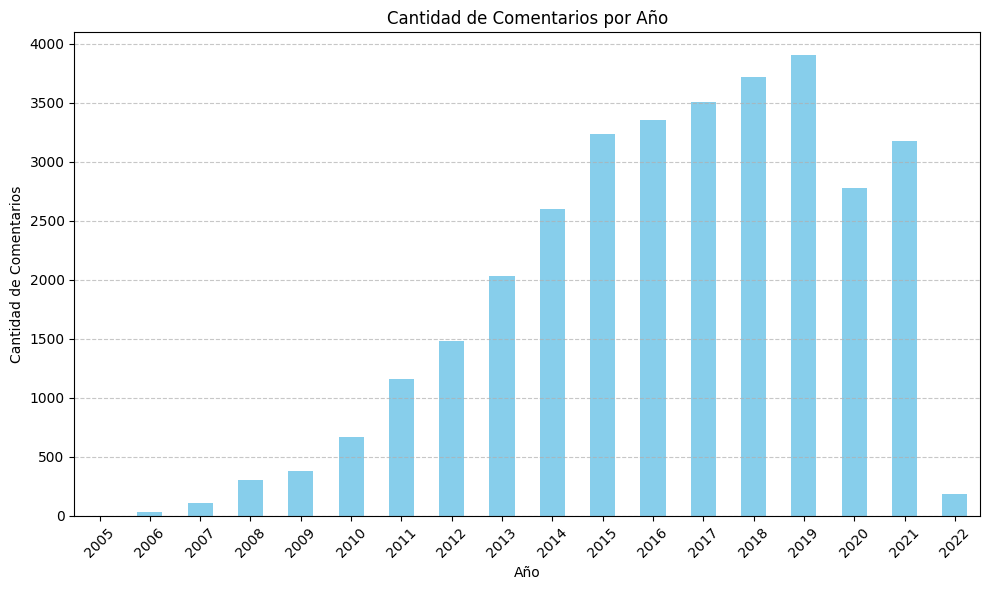

In [52]:

# Convertir la columna 'fecha' a tipo datetime en el momento de graficar
df_review['fecha'] = pd.to_datetime(df_review['fecha'])

# Agrupar por año y contar la cantidad de comentarios en cada año
comentarios_por_año = df_review['fecha'].dt.year.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
comentarios_por_año.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Comentarios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Se aprecia un alza en la cantidad de reseñas. Siendo 2019 el año con más registros. Posterior a esa fecha se aprecia una baja, pero se debe profundizar el análisis para comprender la causa de este fenómeno. 

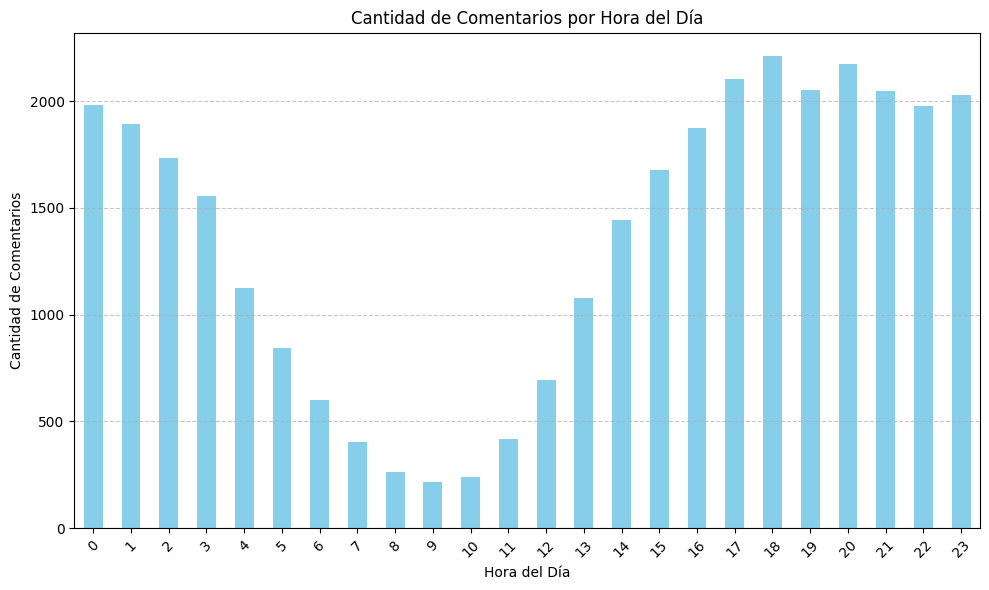

In [53]:
# Agrupar por hora y contar la cantidad de comentarios en cada hora
comentarios_por_hora = df_review['hora_review'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
comentarios_por_hora.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Comentarios por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- La data muestra una tendencia clara respecto las horas con mayor y menor actividad de los usuarios reseñando. El tramo entre las 8 y las 9 am es el menos activo.

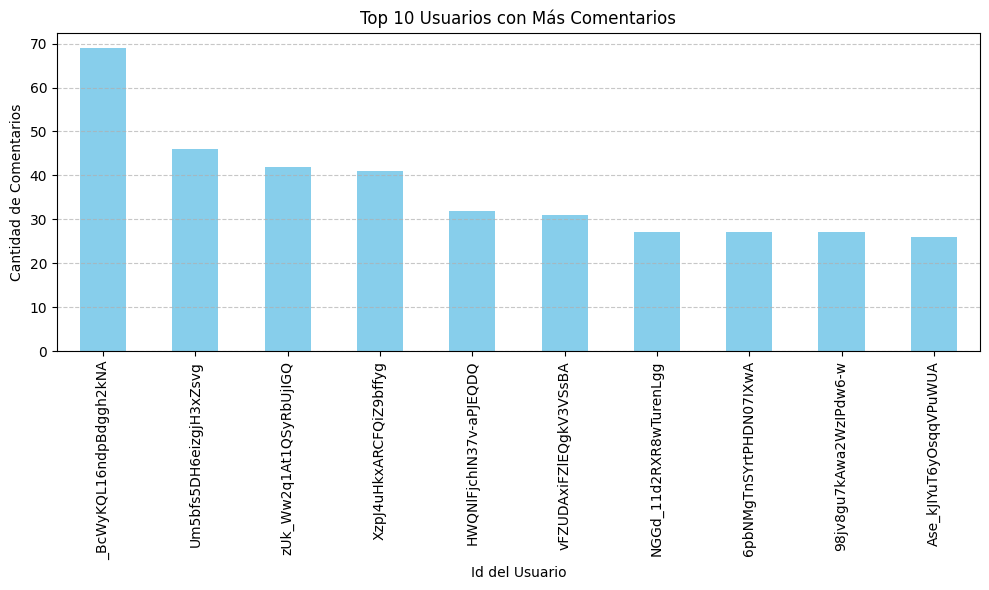

In [54]:
# Contar la cantidad de comentarios por usuario
comentarios_por_usuario = df_review['user_id'].value_counts()

# Obtener los 10 usuarios con más comentarios
top_10_usuarios = comentarios_por_usuario.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_usuarios.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usuarios con Más Comentarios')
plt.xlabel('Id del Usuario')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

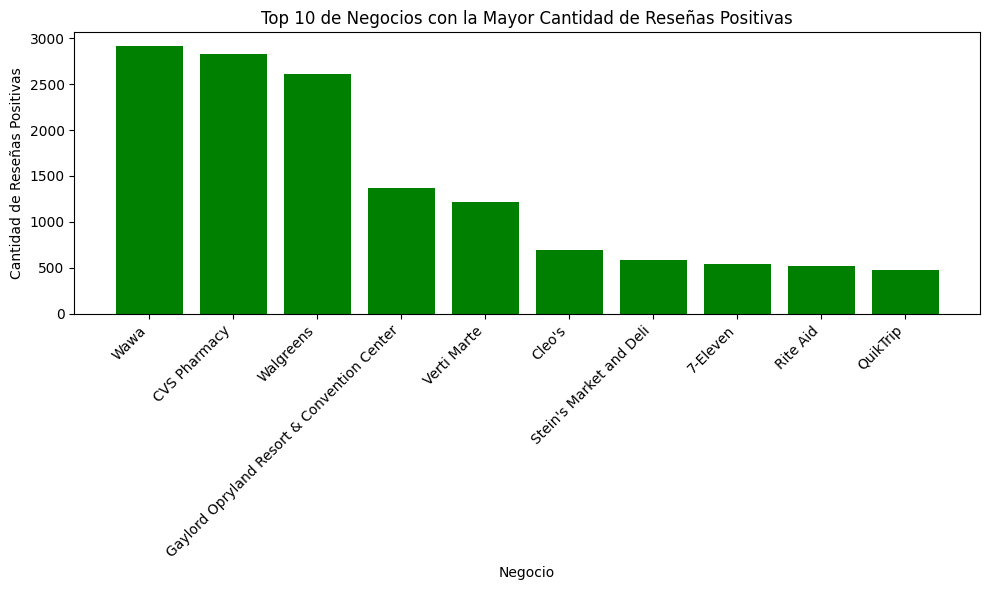

In [55]:
# Filtrar las reseñas con análisis sentimental positivo
reseñas_positivas = df_review[df_review['sentimental_analysis'] == 1]

# Contar la cantidad de reseñas positivas por negocio
cantidad_reseñas_positivas_por_negocio = reseñas_positivas.groupby('name_business').size()

# Seleccionar los 10 negocios con más reseñas positivas
top_10_negocios_positivos = cantidad_reseñas_positivas_por_negocio.nlargest(10)

# Obtener los nombres de los negocios y la cantidad de reseñas positivas
nombres_negocios = top_10_negocios_positivos.index
cantidad_reseñas_positivas = top_10_negocios_positivos.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres_negocios, cantidad_reseñas_positivas, color='green')
plt.title('Top 10 de Negocios con la Mayor Cantidad de Reseñas Positivas')
plt.xlabel('Negocio')
plt.ylabel('Cantidad de Reseñas Positivas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- En base a la columna de análisis de sentimiento, Wawa lidera la lista de locales con mejor recepción por parte de los usuarios. Walgreens ocupa el tercer puesto. 

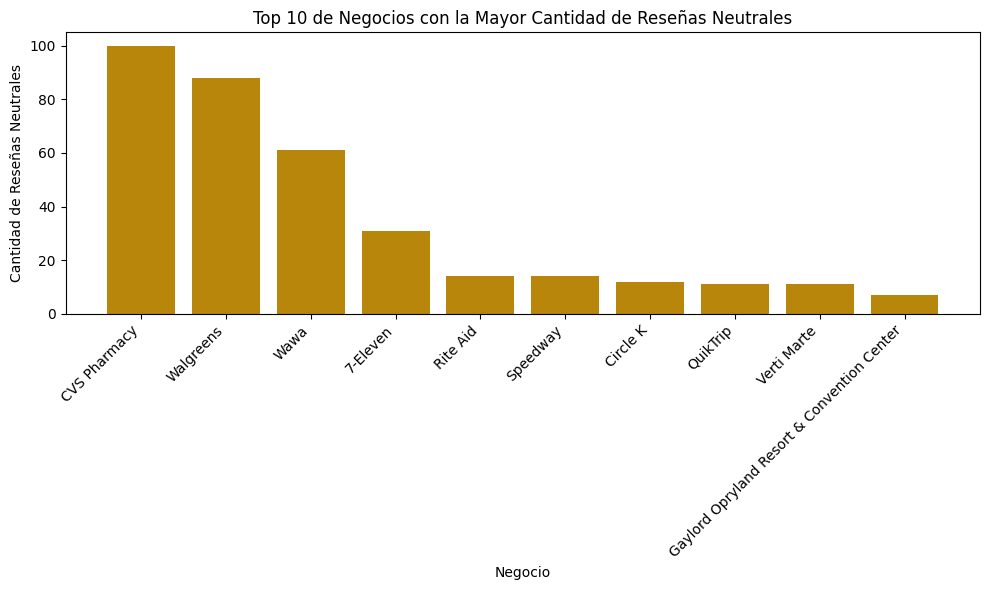

In [56]:
# Filtrar las reseñas con análisis sentimental neutro
reseñas_neutrales = df_review[df_review['sentimental_analysis'] == 0]

# Contar la cantidad de reseñas neutrales por negocio
cantidad_reseñas_neutrales_por_negocio = reseñas_neutrales.groupby('name_business').size()

# Seleccionar los 10 negocios con más reseñas neutrales
top_10_negocios_neutrales = cantidad_reseñas_neutrales_por_negocio.nlargest(10)

# Obtener los nombres de los negocios y la cantidad de reseñas neutrales
nombres_negocios = top_10_negocios_neutrales.index
cantidad_reseñas_neutrales = top_10_negocios_neutrales.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres_negocios, cantidad_reseñas_neutrales, color='darkgoldenrod')
plt.title('Top 10 de Negocios con la Mayor Cantidad de Reseñas Neutrales')
plt.xlabel('Negocio')
plt.ylabel('Cantidad de Reseñas Neutrales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- En el caso de reseñas de caracter neutral, CVS pharmacy lidera la lista. Walgreens le sigue de cerca.

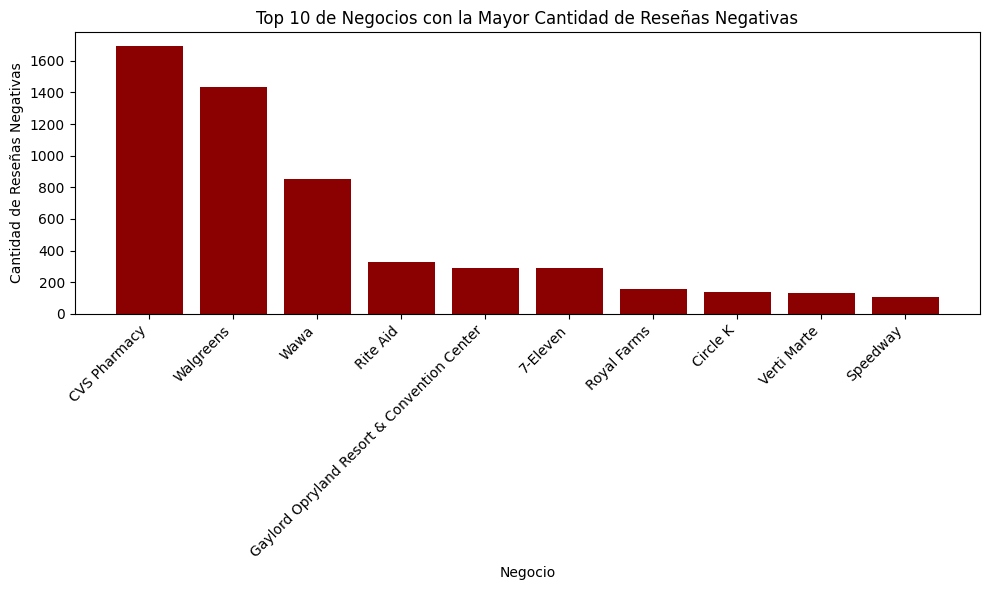

In [57]:
# Filtrar las reseñas con análisis sentimental negativo
reseñas_negativas = df_review[df_review['sentimental_analysis'] == -1]

# Contar la cantidad de reseñas negativas por negocio
cantidad_reseñas_negativas_por_negocio = reseñas_negativas.groupby('name_business').size()

# Seleccionar los 10 negocios con más reseñas negativas
top_10_negocios_negativos = cantidad_reseñas_negativas_por_negocio.nlargest(10)

# Obtener los nombres de los negocios y la cantidad de reseñas negativas
nombres_negocios = top_10_negocios_negativos.index
cantidad_reseñas_negativas = top_10_negocios_negativos.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres_negocios, cantidad_reseñas_negativas, color='darkred')
plt.title('Top 10 de Negocios con la Mayor Cantidad de Reseñas Negativas')
plt.xlabel('Negocio')
plt.ylabel('Cantidad de Reseñas Negativas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Respecto a las reseñas negativas, CSV Pharmacy vuelve a encabezar la lista, con Walgreens nuevamente siguiendole de cerca. Es notoria la diferencia en la proporción de reseñas negativas, positivas y neutras. Siendo las primeras las mayoritarias.

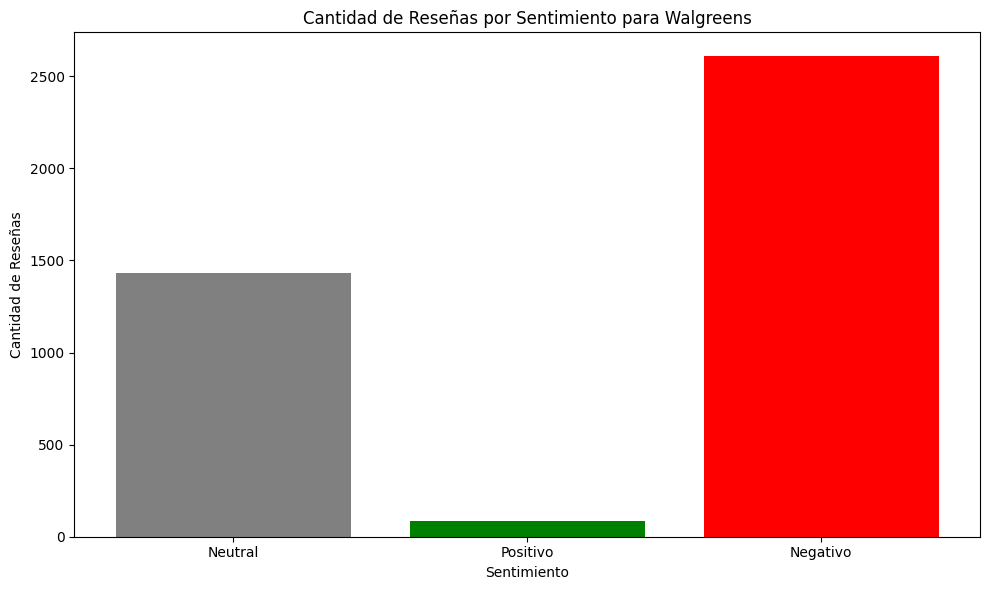

Cantidad de reseñas por tipo de sentimiento para Walgreens:
sentimental_analysis
 1    2608
-1    1432
 0      88
Name: count, dtype: int64

Porcentaje de reseñas por tipo de sentimiento para Walgreens:
sentimental_analysis
 1    63.178295
-1    34.689922
 0     2.131783
Name: count, dtype: float64


In [58]:
# Filtrar las reseñas para el negocio Walgreens
reseñas_walgreens = df_review[df_review['name_business'] == 'Walgreens']

# Contar la cantidad de reseñas por tipo de sentimiento para Walgreens
cantidad_reseñas_por_sentimiento = reseñas_walgreens['sentimental_analysis'].value_counts()

# Calcular el porcentaje de reseñas por tipo de sentimiento para Walgreens
porcentaje_reseñas_por_sentimiento = (cantidad_reseñas_por_sentimiento / len(reseñas_walgreens)) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cantidad_reseñas_por_sentimiento.index, cantidad_reseñas_por_sentimiento, color=['red', 'gray', 'green'])
plt.title('Cantidad de Reseñas por Sentimiento para Walgreens')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(cantidad_reseñas_por_sentimiento.index, ['Negativo', 'Neutral', 'Positivo'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir la cantidad y el porcentaje de reseñas por tipo de sentimiento para Walgreens
print("Cantidad de reseñas por tipo de sentimiento para Walgreens:")
print(cantidad_reseñas_por_sentimiento)
print("\nPorcentaje de reseñas por tipo de sentimiento para Walgreens:")
print(porcentaje_reseñas_por_sentimiento)

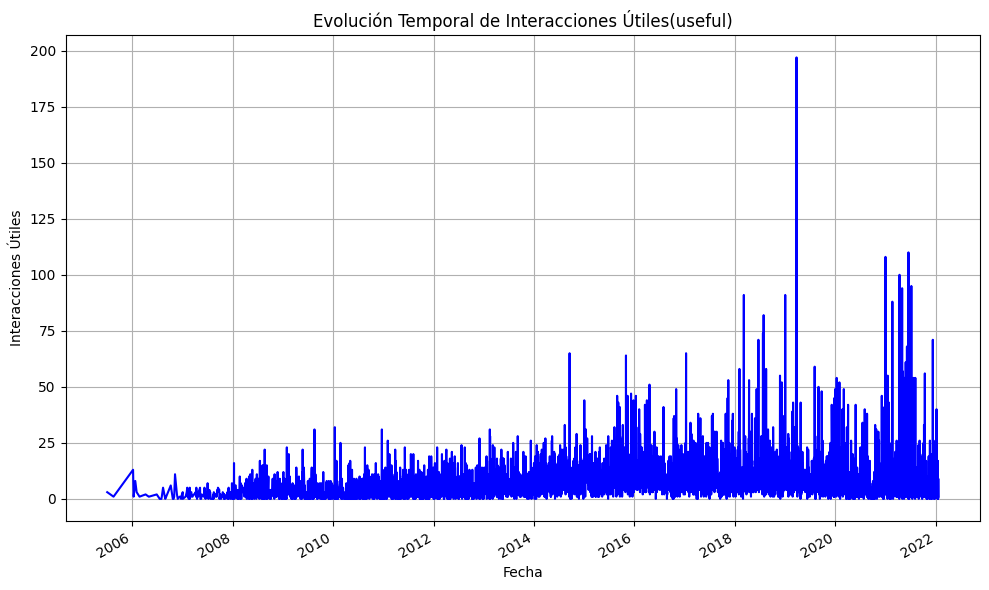

In [80]:
# Agrupar por fecha y sumar las interacciones "useful" por día
interacciones_useful_por_dia = df_review.groupby('fecha')['useful'].sum()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
interacciones_useful_por_dia.plot(color='blue')
plt.title('Evolución Temporal de Interacciones Útiles(useful)')
plt.xlabel('Fecha')
plt.ylabel('Interacciones Útiles')
plt.grid(True)
plt.tight_layout()
plt.show()


- se vuelve a notar la tendencia de mayor volúmen de reseñas en 

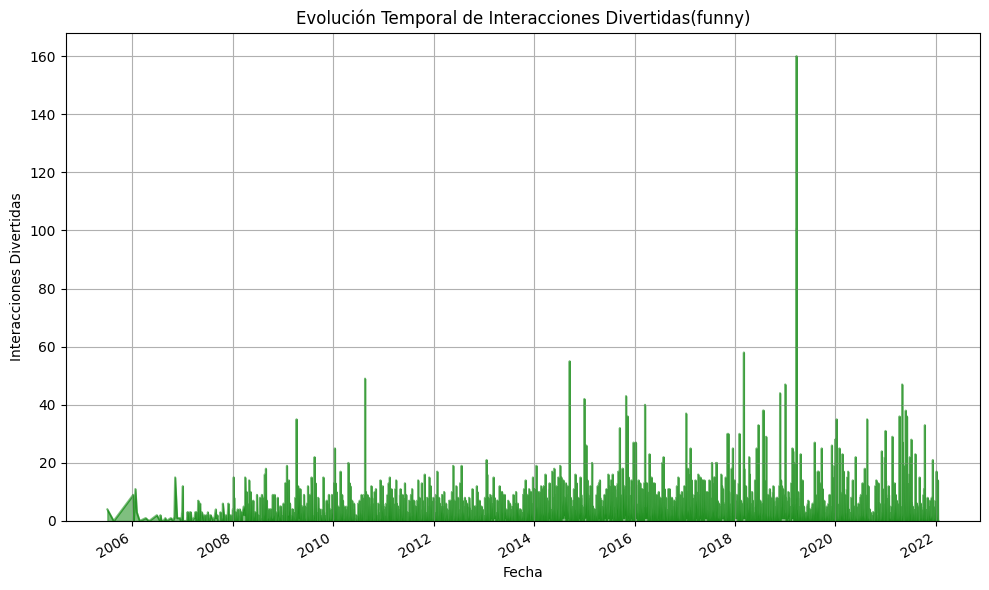

In [59]:
# Agrupar por fecha y sumar las interacciones "funny" por día
interacciones_funny_por_dia = df_review.groupby('fecha')['funny'].sum()

# Crear el gráfico de área
plt.figure(figsize=(10, 6))
interacciones_funny_por_dia.plot(kind='area', color='green', alpha=0.5)
plt.title('Evolución Temporal de Interacciones Divertidas(funny)')
plt.xlabel('Fecha')
plt.ylabel('Interacciones Divertidas')
plt.grid(True)
plt.tight_layout()
plt.show()


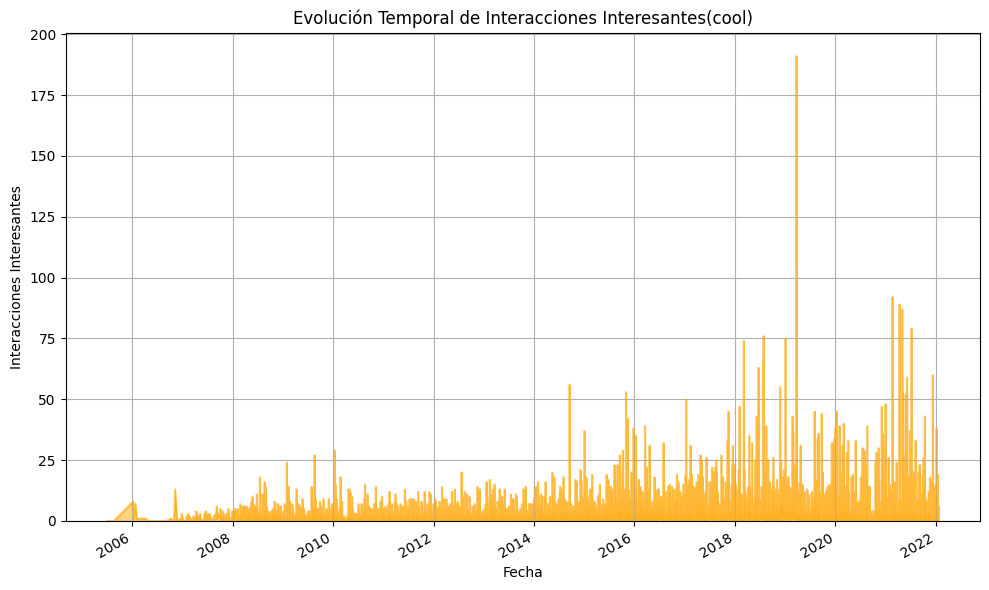

In [82]:
# Agrupar por fecha y sumar las interacciones "cool" por día
interacciones_funny_por_dia = df_review.groupby('fecha')['cool'].sum()

# Crear el gráfico de área
plt.figure(figsize=(10, 6))
interacciones_funny_por_dia.plot(kind='area', color='orange', alpha=0.5)
plt.title('Evolución Temporal de Interacciones Interesantes(cool)')
plt.xlabel('Fecha')
plt.ylabel('Interacciones Interesantes')
plt.grid(True)
plt.tight_layout()
plt.show()


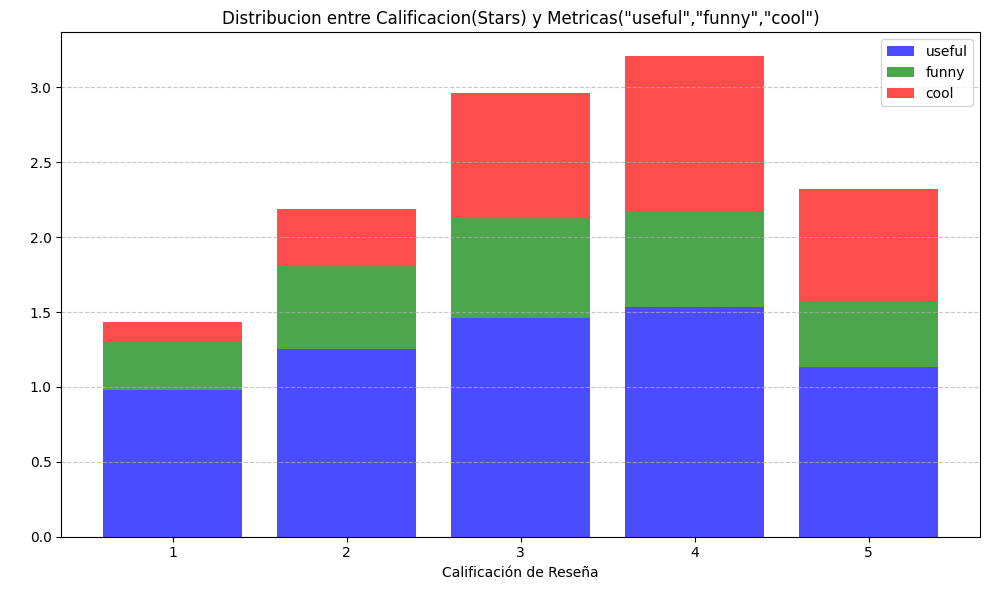

In [60]:
# Calcular el promedio de cada columna para cada calificación de reseña
useful_mean = df_review.groupby('stars')['useful'].mean()
funny_mean = df_review.groupby('stars')['funny'].mean()
cool_mean = df_review.groupby('stars')['cool'].mean()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))

# Barras para la columna 'useful'
plt.bar(useful_mean.index, useful_mean, color='blue', label='useful', alpha=0.7)

# Barras para la columna 'funny'
plt.bar(funny_mean.index, funny_mean, bottom=useful_mean, color='green', label='funny', alpha=0.7)

# Barras para la columna 'cool'
plt.bar(cool_mean.index, cool_mean, bottom=useful_mean + funny_mean, color='red', label='cool', alpha=0.7)

plt.title('Distribucion entre Calificacion(Stars) y Metricas("useful","funny","cool")')
plt.xlabel('Calificación de Reseña')
plt.ylabel('  ')
plt.legend()
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [90]:

# Descargar el conjunto de palabras de parada si no lo tienes ya
nltk.download('stopwords')

# Obtener una lista de palabras de parada comunes en inglés
stop_words = set(stopwords.words('english'))

# Filtrar solo las reseñas del negocio "Walgreens"
reseñas_walgreens = df_review[df_review['name_business'] == 'Walgreens']

# Filtrar las reseñas positivas y negativas del negocio "Walgreens"
reseñas_positivas = reseñas_walgreens[reseñas_walgreens['sentimental_analysis'] == 1]['text']
reseñas_negativas = reseñas_walgreens[reseñas_walgreens['sentimental_analysis'] == -1]['text']

# Función para tokenizar y limpiar el texto
def limpiar_texto(texto):
    tokens = nltk.word_tokenize(texto.lower())  # Convertir a minúsculas y tokenizar
    limpios = [word for word in tokens if word.isalnum() and word not in stop_words]  # Filtrar palabras de parada y no alfanuméricas
    return limpios

# Tokenizar y limpiar las reseñas positivas y negativas del negocio "Walgreens"
palabras_positivas = [palabra for reseña in reseñas_positivas for palabra in limpiar_texto(reseña)]
palabras_negativas = [palabra for reseña in reseñas_negativas for palabra in limpiar_texto(reseña)]

# Contar la frecuencia de palabras en las reseñas positivas y negativas del negocio "Walgreens"
frecuencia_palabras_positivas = Counter(palabras_positivas)
frecuencia_palabras_negativas = Counter(palabras_negativas)

# Obtener las palabras más comunes en reseñas positivas y negativas del negocio "Walgreens"
palabras_mas_comunes_positivas = frecuencia_palabras_positivas.most_common(10)
palabras_mas_comunes_negativas = frecuencia_palabras_negativas.most_common(10)

print("Palabras más comunes en reseñas positivas de Walgreens:")
print(palabras_mas_comunes_positivas)
print("\nPalabras más comunes en reseñas negativas de Walgreens:")
print(palabras_mas_comunes_negativas)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más comunes en reseñas positivas de Walgreens:
[('walgreens', 2354), ('pharmacy', 1729), ('store', 1442), ('get', 1179), ('one', 1136), ('time', 940), ('always', 894), ('staff', 818), ('like', 787), ('would', 774)]

Palabras más comunes en reseñas negativas de Walgreens:
[('pharmacy', 1041), ('walgreens', 968), ('time', 600), ('get', 592), ('one', 578), ('prescription', 543), ('would', 539), ('store', 530), ('go', 482), ('service', 464)]


In [91]:
palabras_mas_comunes_positivas

[('walgreens', 2354),
 ('pharmacy', 1729),
 ('store', 1442),
 ('get', 1179),
 ('one', 1136),
 ('time', 940),
 ('always', 894),
 ('staff', 818),
 ('like', 787),
 ('would', 774)]

In [92]:
palabras_mas_comunes_negativas

[('pharmacy', 1041),
 ('walgreens', 968),
 ('time', 600),
 ('get', 592),
 ('one', 578),
 ('prescription', 543),
 ('would', 539),
 ('store', 530),
 ('go', 482),
 ('service', 464)]

## 3. User, Check-in, Tip

In [ ]:
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,167,206,395,130,915,3396,1915,1915,696,470
2,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,63,46,47,21,518,773,867,867,310,231
3,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,11,2,2,0,16,23,43,43,20,25
4,IpLRJY4CP3fXtlEd8Y4GFQ,Robyn,518,2009-04-11 14:35:46,1325,450,348,"2009,2010,2011","hdwDo7CLh9aN_9PckAos4Q, ci-mepWGgsgGT3sFI2mhMg...",35,...,4,2,7,1,35,17,20,20,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34929,85_uGvqVkwbjVY8YIMOlug,KC,16,2013-08-02 23:30:04,8,1,2,,2M-XDwADz9Bhwhd_RNAHqg,0,...,0,0,0,0,0,0,0,0,0,0
34930,IBO22g3UAEAOZm-10KZDtg,Izzy,100,2013-10-10 02:53:57,108,47,30,,"yT-_eBBTWf-iR8LflMZjAg, LR5KLo9TkFbuLTUnQXz0xA...",2,...,0,0,0,0,2,4,1,1,0,0
34931,O6e_dHvcb_UnsjmCXcQu_w,Melanie,29,2007-05-08 15:50:15,56,2,26,,"cSGDhxbg-zMO376-tvDgHw, 28HzJxxy91efxfh_qM2osQ...",3,...,3,0,0,0,4,2,1,1,0,0
34932,RPyGU7Q0Sqklh-9B3eTd-w,James,51,2015-04-09 22:30:23,42,8,16,,"08VmvYRYOoIZvXNTxxGdzg, q8pAYhK0Mpar_Vb_1R_tkg...",1,...,0,0,0,0,2,3,0,0,1,0


In [ ]:
df_checkin = pd.read_json('../datos_crudo/checkin.json', lines=True)
df_checkin

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [ ]:
df_tip = pd.read_json('../datos_crudo/tip.json', lines=True)
df_tip

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


al realizar una lectura y buscar informacion util, se llego a la conclucion de que los archivos no contienen ningun dato de utilidad para el proyecto que estamos realizando.

por lo que se descartaran su utilizacion